# Import

In [137]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import itertools
%matplotlib inline

pd.set_option('display.float_format', '{:.2f}'.format)

# Functions

In [138]:
def get_boxplot(DF, column, parameter):
    # функция для быстрого построения боксплота
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.boxplot(x=column, y=parameter,
                data=DF.loc[DF.loc[:, column].isin(
                    DF.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.grid()
    plt.show()

def IQR_outlier(df: pd.DataFrame, column: object, verbose: bool=True) -> tuple:
    '''
    Функция для отображения границ межквартильного размаха
    '''
    perc25 = df[column].quantile(0.25)
    perc75 = df[column].quantile(0.75)
    IQR = perc75 - perc25
    low = perc25 - 1.5*IQR
    high = perc75 + 1.5*IQR
    if verbose:
        print('25-й перцентиль: {},'.format(perc25)[:-1], '75-й перцентиль: {},'.format(perc75),
            "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=low, l=high))
    return (low, high)

# 1. Данные

In [139]:
df = pd.read_csv('Flights.csv', sep='\t')

In [140]:
df = df.drop(['flight_id.1','flight_id.2','aircraft_code.1','flight_id.3'], axis=1)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   flight_id            180 non-null    int64  
 1   flight_no            180 non-null    object 
 2   scheduled_departure  180 non-null    object 
 3   scheduled_arrival    180 non-null    object 
 4   departure_airport    180 non-null    object 
 5   arrival_airport      180 non-null    object 
 6   status               180 non-null    object 
 7   aircraft_code        180 non-null    object 
 8   actual_departure     180 non-null    object 
 9   actual_arrival       180 non-null    object 
 10  amount_sum           180 non-null    float64
 11  business_count       180 non-null    int64  
 12  economy_count        180 non-null    int64  
 13  cost                 180 non-null    float64
 14  rate_minute          180 non-null    float64
 15  minutes_count        180 non-null    flo

In [142]:
df.scheduled_arrival = pd.to_datetime(df.scheduled_arrival)
df.scheduled_departure = pd.to_datetime(df.scheduled_departure)

In [143]:
df

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival,amount_sum,business_count,economy_count,cost,rate_minute,minutes_count
0,136642,PG0480,2017-01-30 12:25:00,2017-01-30 13:15:00,AAQ,EGO,Arrived,SU9,2017-01-30 12:28:00,2017-01-30 13:17:00,531000.00,10,54,41.44,28.33,49.00
1,136807,PG0480,2017-02-23 12:25:00,2017-02-23 13:15:00,AAQ,EGO,Arrived,SU9,2017-02-23 12:28:00,2017-02-23 13:18:00,531000.00,8,60,39.55,28.33,50.00
2,136844,PG0480,2017-02-28 12:25:00,2017-02-28 13:15:00,AAQ,EGO,Arrived,SU9,2017-02-28 12:26:00,2017-02-28 13:16:00,575100.00,6,73,39.55,28.33,50.00
3,136887,PG0480,2017-01-20 12:25:00,2017-01-20 13:15:00,AAQ,EGO,Arrived,SU9,2017-01-20 12:30:00,2017-01-20 13:19:00,595200.00,8,70,41.44,28.33,49.00
4,136922,PG0480,2017-02-11 12:25:00,2017-02-11 13:15:00,AAQ,EGO,Arrived,SU9,2017-02-11 12:27:00,2017-02-11 13:17:00,607800.00,10,66,39.55,28.33,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,136226,PG0252,2017-01-30 13:05:00,2017-01-30 14:45:00,AAQ,SVO,Arrived,733,2017-01-30 13:08:00,2017-01-30 14:48:00,1886000.00,12,118,41.44,40.00,100.00
176,136316,PG0252,2017-01-12 13:05:00,2017-01-12 14:45:00,AAQ,SVO,Arrived,733,2017-01-12 13:07:00,2017-01-12 14:47:00,1886000.00,12,118,41.44,40.00,100.00
177,136368,PG0252,2016-12-31 13:05:00,2016-12-31 14:45:00,AAQ,SVO,Arrived,733,2016-12-31 13:07:00,2016-12-31 14:47:00,1886000.00,12,118,38.87,40.00,100.00
178,136474,PG0252,2016-12-02 13:05:00,2016-12-02 14:45:00,AAQ,SVO,Arrived,733,2016-12-02 13:06:00,2016-12-02 14:44:00,1886000.00,12,118,38.87,40.00,98.00


# 2. Анализ данных

In [144]:
df['losses'] = df.cost * df.rate_minute * df.minutes_count
df['profit'] = df.amount_sum - df.losses
df['day_of_week'] = df.scheduled_departure.dt.day_name()
df['hour'] = df.scheduled_departure.dt.hour

<AxesSubplot:>

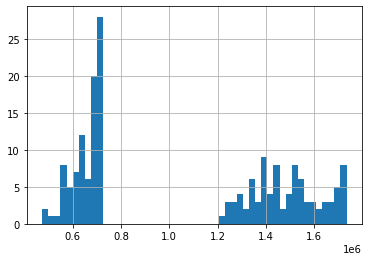

In [145]:
df['profit'].hist(bins=50)

Заметно, что прибыль отличается в двух больших группах. Что это за группы?

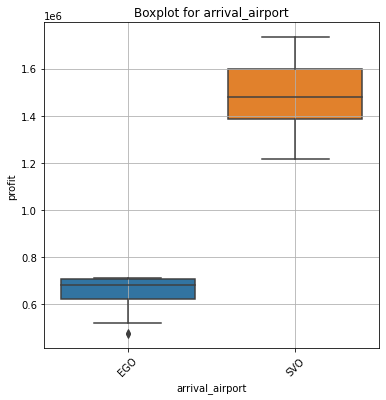

In [146]:
get_boxplot(df, 'arrival_airport', 'profit')

In [147]:
IQR_low, IQR_high = IQR_outlier(df[df.aircraft_code == 'SU9'], 'profit', True)
IQR_low

25-й перцентиль: 622075.6254166666 75-й перцентиль: 705329.7308333333, IQR: 83254.10541666672,  Границы выбросов: [497194.46729166654, 830210.8889583334].


497194.46729166654

Имеем 2 направления с разными воздушными суднами. Как привести их к относительным величинам? Возьмём относительные потери (относительно полной стоимости билетов). Так мы косвенно учтём, что в цену билетов заложено расстояние до пункта назначения.

In [148]:
df['losses_rel'] = df.losses / df.amount_sum

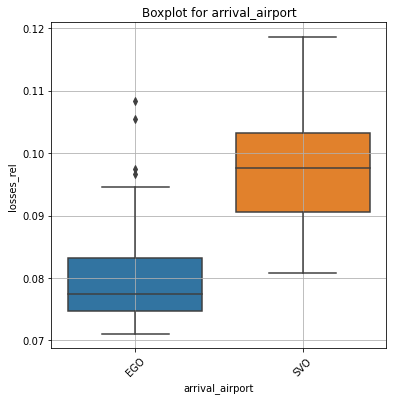

In [149]:
get_boxplot(df, 'arrival_airport', 'losses_rel')

In [150]:
df[df.arrival_airport == 'EGO'].losses_rel.mean() / df[df.arrival_airport == 'SVO'].losses_rel.mean()

0.8190392369129187

На графике для Белгорода (самолёт Суперджет) заметны выбросы относительных потерь. В среднем относительные потери при перелёте самолётом SU-100 на 18% ниже, чем относительные потери Боинга 737-300. Это логично, ведь Боинг крупнее и потребляет больше топлива, а другие потери мы не учитывали.  
Для суперджета количество мест в бизнес классе 12, в эконом классе: 85.

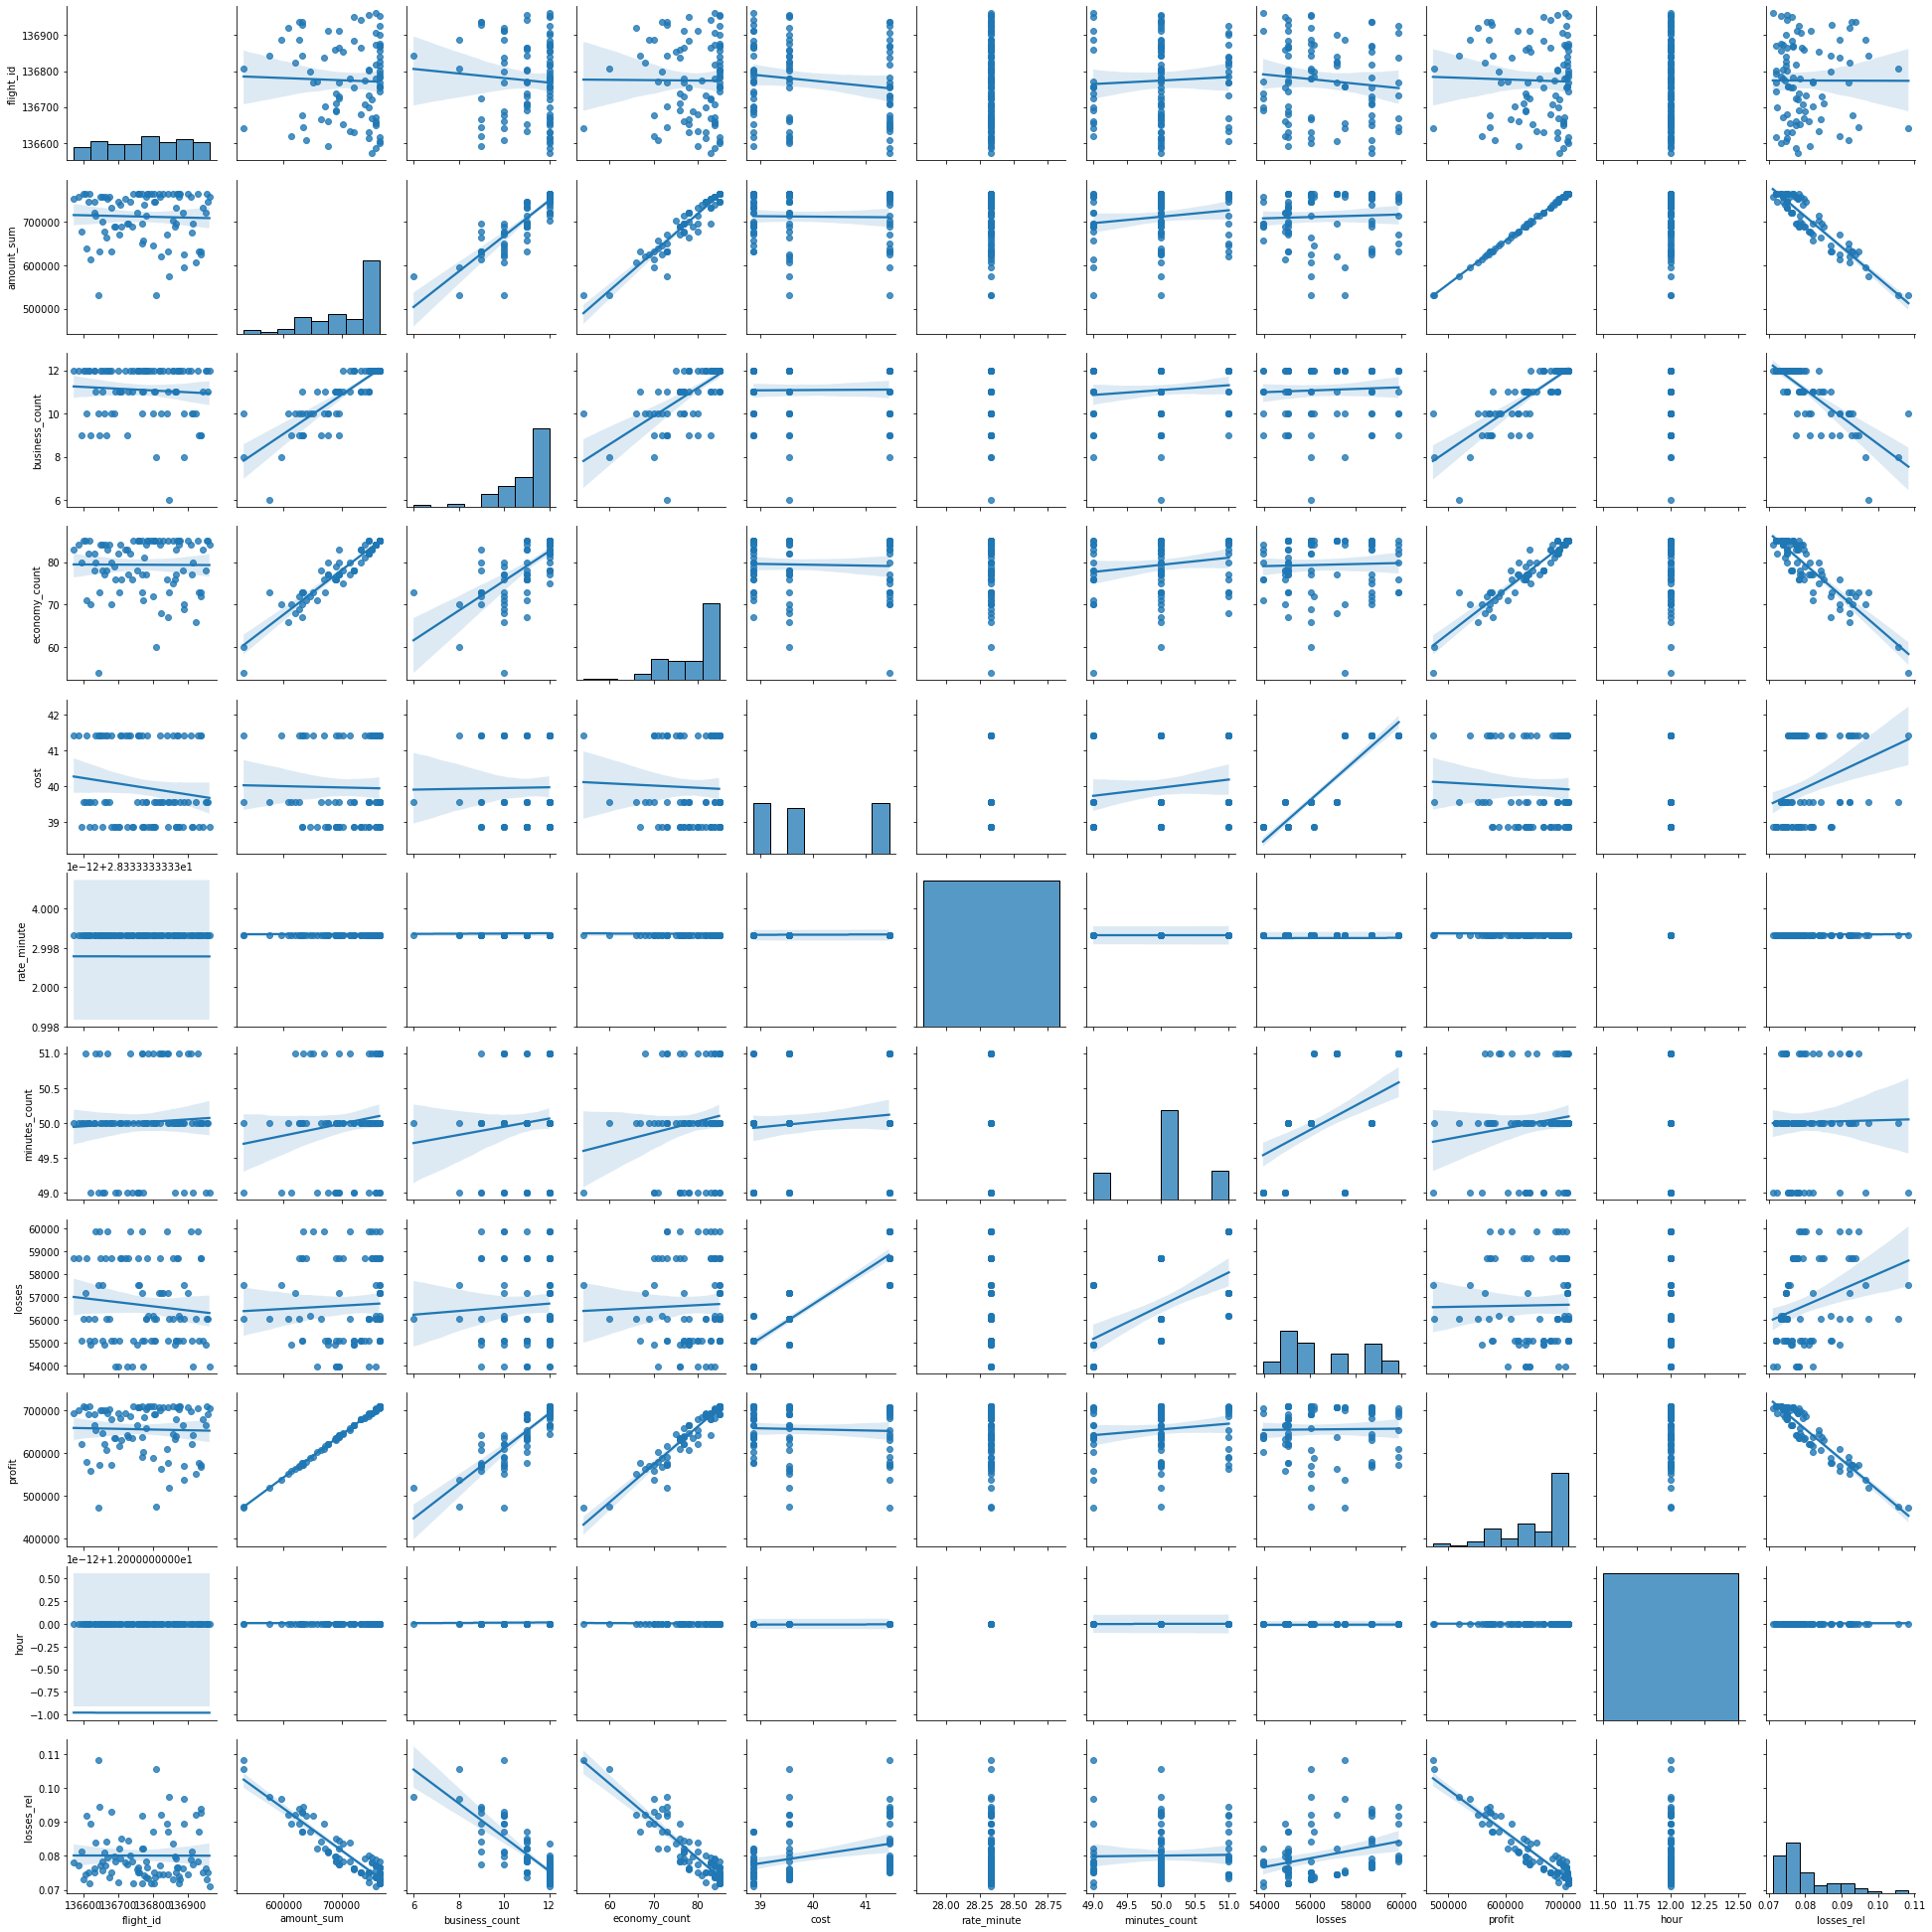

In [151]:
sns.pairplot(df[df.arrival_airport == 'EGO'], kind='reg')

# 3. Анализ выбросов

Ещё раз приведём boxplot для относительных потерь:

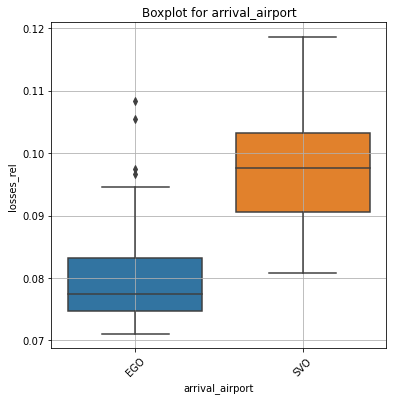

In [133]:
get_boxplot(df, 'arrival_airport', 'losses_rel')

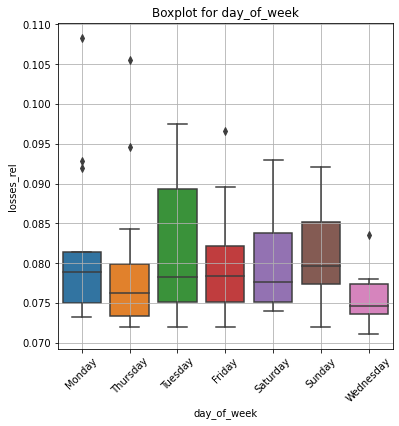

In [161]:
get_boxplot(df[df.aircraft_code == 'SU9'], 'day_of_week', 'losses_rel')

Заметим также, что по графику корреляций наиболее выраженную зависимость с относительными потерями имеет количество занятых мест в эконом классе. Рассмотрим данные, являющиеся выбросами:

In [134]:
IQR_low, IQR_high = IQR_outlier(df[df.aircraft_code == 'SU9'], 'losses_rel', True)
df[(df.aircraft_code == 'SU9') & (df.losses_rel > IQR_high)]

25-й перцентиль: 0.07477050812823328 75-й перцентиль: 0.08321929930028776, IQR: 0.008448791172054479,  Границы выбросов: [0.062097321370151566, 0.09589248605836947].


,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival,amount_sum,business_count,economy_count,cost,rate_minute,minutes_count,losses,profit,day_of_week,losses_rel
0,136642,PG0480,2017-01-30 12:25:00,2017-01-30 13:15:00,AAQ,EGO,Arrived,SU9,2017-01-30 12:28:00,2017-01-30 13:17:00,531000.00,10,54,41.44,28.33,49.00,57525.59,473474.41,Monday,0.11
1,136807,PG0480,2017-02-23 12:25:00,2017-02-23 13:15:00,AAQ,EGO,Arrived,SU9,2017-02-23 12:28:00,2017-02-23 13:18:00,531000.00,8,60,39.55,28.33,50.00,56033.42,474966.58,Thursday,0.11
2,136844,PG0480,2017-02-28 12:25:00,2017-02-28 13:15:00,AAQ,EGO,Arrived,SU9,2017-02-28 12:26:00,2017-02-28 13:16:00,575100.00,6,73,39.55,28.33,50.00,56033.42,519066.58,Tuesday,0.10
3,136887,PG0480,2017-01-20 12:25:00,2017-01-20 13:15:00,AAQ,EGO,Arrived,SU9,2017-01-20 12:30:00,2017-01-20 13:19:00,595200.00,8,70,41.44,28.33,49.00,57525.59,537674.41,Friday,0.10


# 4. Выводы

- Худшими рейсами являются рейсы, в которых наименее заполнены места эконом класса (54-73 места), а места в бизнес-классе заполнены не полностью (менее 10).
- Оптимизировать полёты по времени невозможно, так как по имеющимся данным все самолёты вылетают из Анапы всего в 2 разных времени.
- Из распределения по дням недели можно сказать только то, что наименьшие потери у рейса PG0480 наблюдаются в среду.
- Рейсы с наибольшими относительными потерями приходятся на будние дни (понедельник, вторник, четверг, пятницу), но это не значит, что все эти дни менее прибыльны. Нужно исключать конкретные даты: 01-20, 01-30, 02-23, 02-28.